### What is a time series?
- A sequence of observations taken over time (e.g., daily sales, hourly temperature).

___

## Components of Time Series:
1. **Trend** – Long-term increase or decrease
2. **Seasonality** – Repeating pattern at fixed periods (e.g., yearly, monthly)
3. **Cyclicality** – Long-term fluctuation not of fixed period
4. **Noise/Residual** – Random variation

In [4]:
import pandas as pd
# Replace with your file path
file_path = 'data_analyst/online_retail.xlsx'

# Read the Excel file
df = pd.read_excel(file_path, engine='openpyxl')


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.set_index('InvoiceDate', inplace=True)


In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [9]:
daily_quantity = df['Quantity'].resample('D').sum()
print(daily_quantity.head())


InvoiceDate
2010-12-01    26814
2010-12-02    21023
2010-12-03    14830
2010-12-04        0
2010-12-05    16395
Freq: D, Name: Quantity, dtype: int64


In [19]:
daily_quantity.shape

(374,)

In [10]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
daily_revenue = df['Revenue'].resample('D').sum()


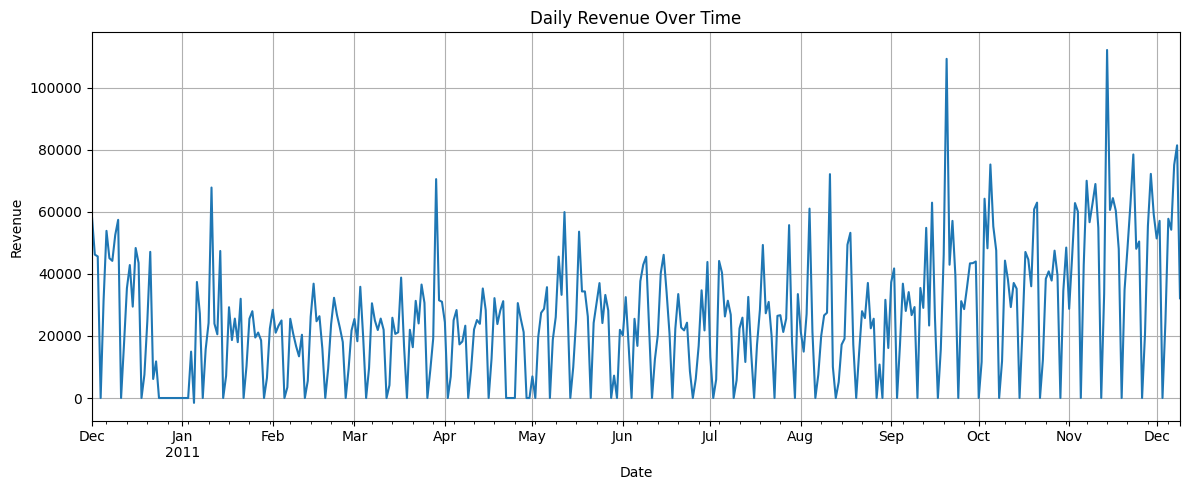

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
daily_revenue.plot()
plt.title("Daily Revenue Over Time")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month


/tmp/ipykernel_7684/1300048755.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df['Revenue'].resample('M').sum()


<Axes: title={'center': 'Monthly Revenue'}, xlabel='InvoiceDate'>

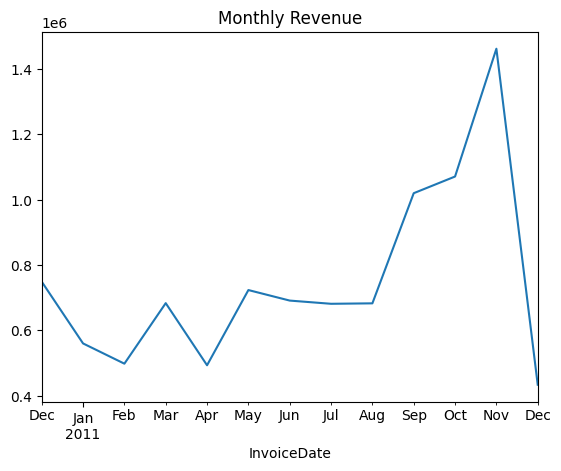

In [16]:
monthly_revenue = df['Revenue'].resample('M').sum()
monthly_revenue.plot(title='Monthly Revenue')


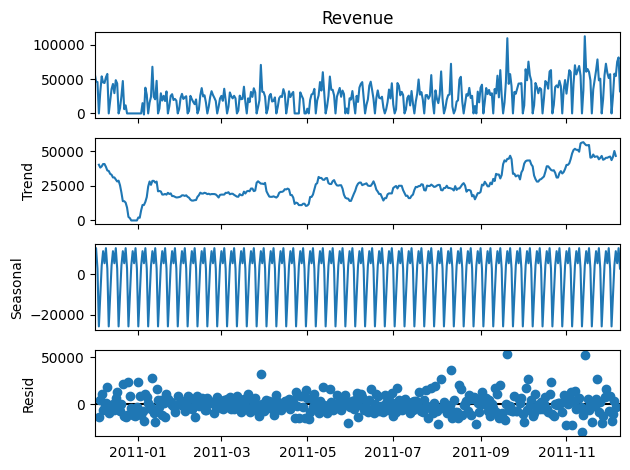

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(daily_revenue.dropna(), model='additive')
result.plot()
plt.show()


____

## 🧠 Core Terms in Time Series Analysis

### 1. Time Series
A sequence of data points recorded or indexed in time order.
E.g., daily stock prices, hourly temperature, monthly sales.

### 2. Timestamp
A specific point in time — like "2023-01-15 14:30:00" — used as an index for the series.

### 3. Frequency
How often data is collected:
- 'D' = daily
- 'H' = hourly
- 'M' = monthly
- 'W' = weekly
- 'Q' = quarterly
- 'Y' = yearly

# 🪜 Time Series Components

### 4. Trend
- A long-term increase or decrease in the data.
It shows general direction over time.
- 📈 Example: Gradual increase in average temperature over 10 years.



### 5. Seasonality
- A repeating pattern at regular time intervals.
Usually caused by calendar-related effects.
- 📅 Example: Higher sales in December every year.



### 6. Cyclic Patterns
- Longer-term ups and downs that are not strictly seasonal.
Caused by business cycles, economic conditions, etc.
- 📉📈 Example: Market booms and recessions.

### 7. Noise (Irregular Component)
- Random unpredictable variations in the data.
Noise does not follow any pattern.
- 🔀 Example: A sudden unexpected drop in sales due to a one-off event.



## 📏 Statistical Concepts
### 8. Stationarity
- A stationary time series has:
  - Constant mean
  - Constant variance
  - No trend or seasonality

- Why important?
 - Many statistical models (like ARIMA) assume stationarity.

 - ✅ Test using: adfuller() from statsmodels.

### 9. Autocorrelation
- The correlation of a time series with a lagged version of itself.

- 💡 Helps detect patterns like seasonality.

- Visualized with:
  - ACF (Autocorrelation Function) plot
  - PACF (Partial ACF)

### 10. Lag
- The number of time steps between the current observation and the previous one.
- 🕒 Example:
  - Lag-1 → Yesterday’s value
  - Lag-2 → Day before yesterday

### 11. Decomposition
- Separates time series into:
  - Trend
  - Seasonality
  - Residual (noise)

### 12. Rolling Statistics / Moving Average
- Smooths out short-term fluctuations.

```python
df['Sales'].rolling(window=7).mean()
```
- 7-day average to observe trend.



## 📈 Modeling Terms
### 13. AR (Autoregression)
- Predicts a variable using its own past values.

### 14. MA (Moving Average)
- Uses past errors to predict future values.

### 15. ARIMA (AutoRegressive Integrated Moving Average)
- A classical model that combines:
  - AR (autoregression)
  - I (integration/differencing)
  - MA (moving average)
- Used for non-seasonal time series forecasting.

### 16. SARIMA (Seasonal ARIMA)
- ARIMA + Seasonality.
- Adds parameters for seasonal trend and noise.



### 17. Forecast Horizon
- How far into the future you are predicting — 7 days, 1 month, etc.

## 🧠 What Are ARIMA and SARIMA?

- 🔹 **ARIMA = AutoRegressive Integrated Moving Average**
Used for non-seasonal time series data.
- 🔹 **SARIMA = Seasonal ARIMA**
Extends ARIMA to handle seasonal patterns (like monthly or weekly cycles).

### 🧩 ARIMA Breakdown

- ARIMA(p, d, q):

| Term | Meaning             | What It Does              |
| ---- | ------------------- | ------------------------- |
| `p`  | Autoregression (AR) | Uses past values (lags)   |
| `d`  | Differencing        | Makes series stationary   |
| `q`  | Moving Average (MA) | Uses past forecast errors |


### 🧩 SARIMA Breakdown

- **SARIMA(p, d, q) × (P, D, Q, s)**
- (P, D, Q) are the seasonal counterparts of ARIMA's (p, d, q)
- s is the seasonal period (e.g., 12 for monthly data, 7 for weekly, 24 for hourly)